# Segundo Projeto - Classificador de Câncer de Pulmão

- **Disciplina**: Inteligência Computacional Aplicada a Saúde
- **Professor**: Andre Georghton Cardoso Pacheco
- **Alunos**: Luiz Carlos Cosmi Filho e Mateus Sobrinho Menines

O conjunto de imagens histopatológicas de câncer de pulmão utilizada nesse trabalho é o [LC25000](). O banco de dados contém 25.000 imagens (RGB) com resolução de 728x728 de tecidos do pulmão e cólon, distribuídas em 5 classes, com cada classe tendo 5.000 imagens:

1. Adenocarcinoma de Cólon;
2. Tecido Benigno do Cólon;
3. Adenocarcinoma Pulmonar;
4. Tecido Pulmonar Benigno;
5. Carcinoma de Células Escamosas Pulmonar.

Esses tecidos foram preparados com a técnica de coloração de hematoxilina e eosina. Neste trabalho, apenas as imagens de tecidos pulmonares foram utilizadas. A seguir, uma análise dados resultados obtidos a partir do script de validação cruzada *k-folds* é realizada.

## Importando as bibliotecas

Para análise, serão utilzados os seguintes pacotes:

* [**matplotlib**](https://matplotlib.org/): biblioteca de software para criação de gráficos e visualizações de dados em geral;
* [**numpy**](https://numpy.org/): biblioteca de software que suporta o processamento de grandes, multi-dimensionais arranjos e matrizes, juntamente com uma grande coleção de funções matemáticas de alto nível para operar sobre estas matrizes;
* [**seaborn**](https://seaborn.pydata.org/): biblioteca de software para no matplotlib. Possui interfaces de alto nível para criação de gráficos pré configurados.
* [**pandas**](https://pandas.pydata.org/): biblioteca de software criada para manipulação e análise de dados;
* [**tabulate**](https://github.com/astanin/python-tabulate): biblioteca de software criada para o print de tabelas;
* [**sklearn**](https://scikit-learn.org/): biblioteca de aprendizado de máquina.

A seguir, importamos diversas funcionalidades dessas bibliotecas apontadas acima.

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)
from tabulate import tabulate

%matplotlib inline
matplotlib.rcParams.update({'font.size': 15})

Ao executar o script de validação cruzada, pode-se encontrar os resultados dentro das pastas em [../data](../data). Nesse sentido, para cada modelo encontra-se as subdivisões em pastas com os resultados, são eles: (i) `test_inference.csv`, apresenta-se o resultado da inferência sobre o conjunto de teste da subdivisão em questão; (ii) `train_metrics.csv`, apresenta-se as perdas e acurácias sobre os conjuntos de validação e treino da subdivisão em questão.

## Resnet50

A seguir carregou-se os resultados das inferências de cada subdivisão para avaliar as métricas do modelo Resnet50.

In [34]:
resnet50_test_folds = [pd.read_csv(f"../data/resnet50_fold_{i}/test_inference.csv") for i in range(5)]
resnet50_test_folds[1].head()

,y_true,y_pred,y_pred_class_0,y_pred_class_1,y_pred_class_2
0,1,1,0.000049,0.805907,0.194044
1,1,2,0.000007,0.280893,0.719100
2,0,0,0.999385,0.000602,0.000013
3,1,1,0.000247,0.987024,0.012729
4,0,0,0.918490,0.075832,0.005677


Para cada subdivisão, computa-se a acurácia, média harmônica F1, precisão, *recall* e matriz de confusão acumulando esses resultados em listas. Ao final, computa-se as médias, desvios padrões, mínimo e máximo.

In [35]:
accuracy_list, f1_list, precision_list, recall_list, cm_list = [], [], [], [], []
for resnet50_test in resnet50_test_folds:
    acc = accuracy_score(
        y_true=resnet50_test["y_true"],
        y_pred=resnet50_test["y_pred"],
    )
    f1 = f1_score(
        y_true=resnet50_test["y_true"],
        y_pred=resnet50_test["y_pred"],
        average="macro",
    )
    precision = precision_score(
        y_true=resnet50_test["y_true"],
        y_pred=resnet50_test["y_pred"],
        average="macro",
    )
    recall = recall_score(
        y_true=resnet50_test["y_true"],
        y_pred=resnet50_test["y_pred"],
        average="macro",
    )
    cm = confusion_matrix(resnet50_test["y_true"].values, resnet50_test["y_pred"].values, normalize="true")
    cm_list.append(cm)
    accuracy_list.append(acc)
    f1_list.append(f1)
    precision_list.append(precision)
    recall_list.append(recall)
data = [
    ["Metric", "Mean", "Standard deviation", "Minimum", "Maximum"],
    ["Accuracy", np.mean(accuracy_list), np.std(accuracy_list), np.min(accuracy_list), np.max(accuracy_list)],
    ["F1",  np.mean(f1_list), np.std(f1_list), np.min(f1_list), np.max(f1_list)],
    ["Precision", np.mean(precision_list), np.std(precision_list), np.min(precision_list), np.max(precision_list)],
    ["Recall",  np.mean(recall_list), np.std(recall_list), np.min(recall_list), np.max(recall_list)],
]
table = tabulate(data, headers="firstrow", tablefmt="grid")
print(table)

+-----------+----------+----------------------+-----------+-----------+
| Metric    |     Mean |   Standard deviation |   Minimum |   Maximum |
+===========+==========+======================+===========+===========+
| Accuracy  | 0.9186   |           0.00354275 |  0.913667 |  0.922667 |
+-----------+----------+----------------------+-----------+-----------+
| F1        | 0.918767 |           0.0034989  |  0.913867 |  0.922805 |
+-----------+----------+----------------------+-----------+-----------+
| Precision | 0.92077  |           0.00344869 |  0.915921 |  0.925244 |
+-----------+----------+----------------------+-----------+-----------+
| Recall    | 0.9186   |           0.00354275 |  0.913667 |  0.922667 |
+-----------+----------+----------------------+-----------+-----------+


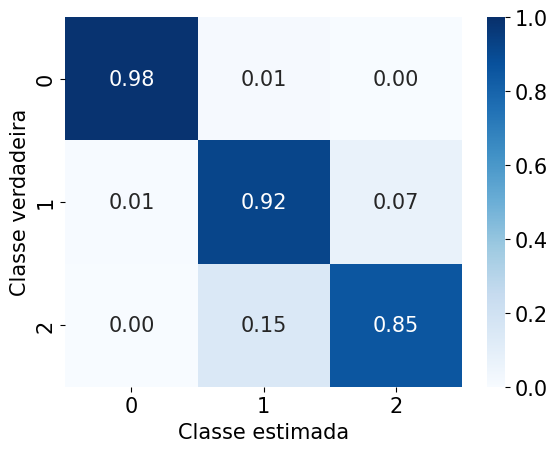

In [36]:
cms = np.zeros((3, 3))
for cm in cm_list:
    cms = cms + cm
cms = cms/5

ax = sns.heatmap(
    cms,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    cbar=True,
    vmin=0,
    vmax=1,
)
ax.set_ylabel('Classe verdadeira')
ax.set_xlabel('Classe estimada')
ax.xaxis.set_ticklabels(['0', '1', '2'])
ax.yaxis.set_ticklabels(['0', '1', '2'])

plt.savefig('../results/resnet50_mean_cm.png',  dpi=300, bbox_inches = "tight")
plt.show()

Para cada subdivisão, apresentou-se as curvas da função de perda sobre os conjuntos de validação e treino.

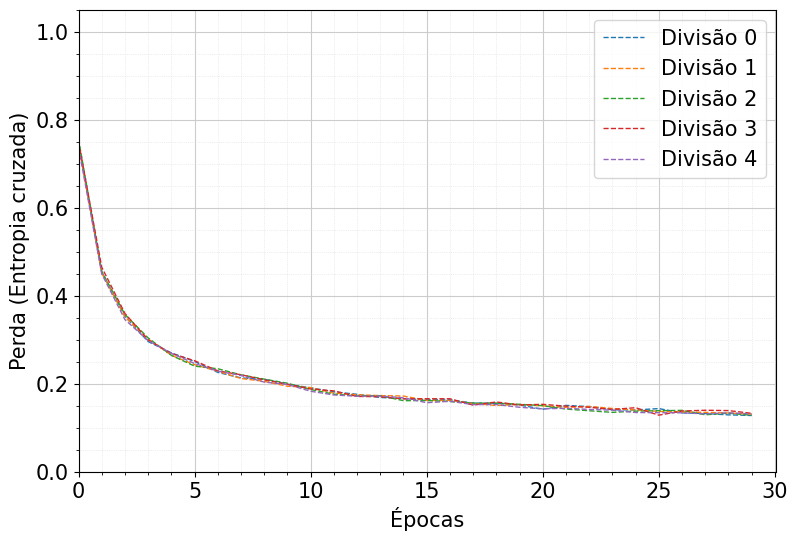

In [56]:
def plot_train_curve(losses_train, acc_train, figsize=(9, 6), name="test.png"):

    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlim([0.0, 30.05])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Épocas')
    ax.set_ylabel('Perda (Entropia cruzada)')
    for i, loss in enumerate(losses_train):
        ax.plot(
            np.arange(0, len(loss), 1),
            loss,
            label=f"Divisão {i}",
            linestyle="--",
            markersize=8,
            linewidth=1,
        )
    ax.legend(loc="best")
    ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
    ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
    ax.minorticks_on()
    plt.savefig(name)
    plt.show()

resnet50_train_folds = [pd.read_csv(f"../data/resnet50_fold_{i}/train_metrics.csv") for i in range(5)]
resnet50_train_folds[1].head()

plot_train_curve(
    losses_train=[i["losses_train"] for i in resnet50_train_folds],
    acc_train=[i["acc_train"] for i in resnet50_train_folds],
    name="../results/resnet50_folds_train_curve.png"
)

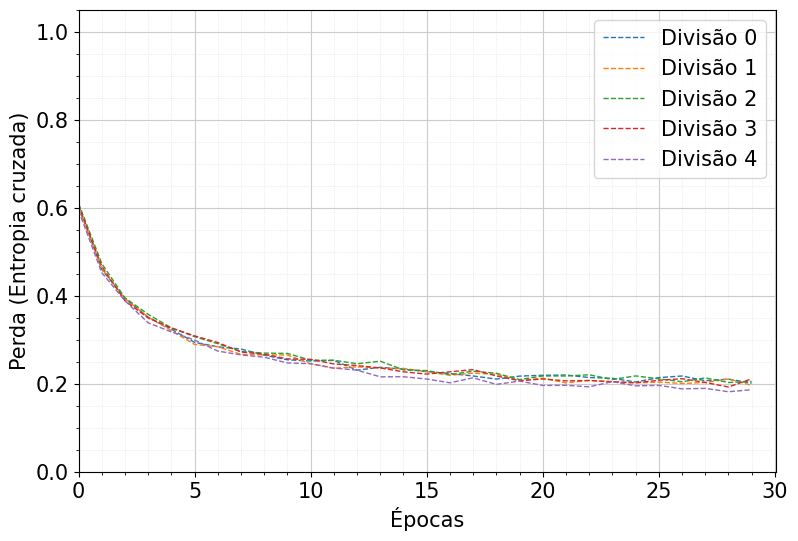

In [57]:
plot_train_curve(
    losses_train=[i["losses_val"] for i in resnet50_train_folds],
    acc_train=[i["acc_val"] for i in resnet50_train_folds],
    name="../results/resnet50_folds_val_curve.png"
)

## VGG19

A seguir carregou-se os resultados das inferências de cada subdivisão para avaliar as métricas do modelo VGG-19.

In [37]:
vgg19_test_folds = [pd.read_csv(f"../data/vgg19_fold_{i}/test_inference.csv") for i in range(5)]
vgg19_test_folds[1].head()

,y_true,y_pred,y_pred_class_0,y_pred_class_1,y_pred_class_2
0,2,2,3.787933e-05,1.496435e-01,8.503187e-01
1,1,1,1.986842e-02,9.462879e-01,3.384367e-02
2,1,1,9.186991e-05,9.523342e-01,4.757390e-02
3,2,2,2.132163e-11,5.210677e-05,9.999479e-01
4,0,0,1.000000e+00,9.419385e-10,1.987563e-21


Para cada subdivisão, computa-se a acurácia, média harmônica F1, precisão, *recall* e matriz de confusão acumulando esses resultados em listas. Ao final, computa-se as médias, desvios padrões, mínimo e máximo.

In [38]:
accuracy_list, f1_list, precision_list, recall_list, cm_list = [], [], [], [], []
for vgg19_test in vgg19_test_folds:
    acc = accuracy_score(
        y_true=vgg19_test["y_true"],
        y_pred=vgg19_test["y_pred"],
    )
    f1 = f1_score(
        y_true=vgg19_test["y_true"],
        y_pred=vgg19_test["y_pred"],
        average="macro",
    )
    precision = precision_score(
        y_true=vgg19_test["y_true"],
        y_pred=vgg19_test["y_pred"],
        average="macro",
    )
    recall = recall_score(
        y_true=vgg19_test["y_true"],
        y_pred=vgg19_test["y_pred"],
        average="macro",
    )
    cm = confusion_matrix(vgg19_test["y_true"].values, vgg19_test["y_pred"].values, normalize="true")

    accuracy_list.append(acc)
    f1_list.append(f1)
    precision_list.append(precision)
    recall_list.append(recall)
    cm_list.append(cm)
data = [
    ["Metric", "Mean", "Standard deviation", "Minimum", "Maximum"],
    ["Accuracy", np.mean(accuracy_list), np.std(accuracy_list), np.min(accuracy_list), np.max(accuracy_list)],
    ["F1",  np.mean(f1_list), np.std(f1_list), np.min(f1_list), np.max(f1_list)],
    ["Precision", np.mean(precision_list), np.std(precision_list), np.min(precision_list), np.max(precision_list)],
    ["Recall",  np.mean(recall_list), np.std(recall_list), np.min(recall_list), np.max(recall_list)],
]
table = tabulate(data, headers="firstrow", tablefmt="grid")
print(table)

+-----------+----------+----------------------+-----------+-----------+
| Metric    |     Mean |   Standard deviation |   Minimum |   Maximum |
+===========+==========+======================+===========+===========+
| Accuracy  | 0.955    |           0.00589161 |  0.949    |  0.966    |
+-----------+----------+----------------------+-----------+-----------+
| F1        | 0.954933 |           0.0058265  |  0.948988 |  0.965834 |
+-----------+----------+----------------------+-----------+-----------+
| Precision | 0.955082 |           0.0057904  |  0.949021 |  0.965903 |
+-----------+----------+----------------------+-----------+-----------+
| Recall    | 0.955    |           0.00589161 |  0.949    |  0.966    |
+-----------+----------+----------------------+-----------+-----------+


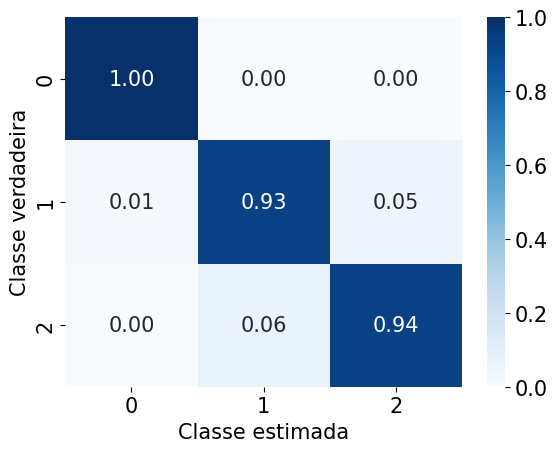

In [39]:
cms = np.zeros((3, 3))
for cm in cm_list:
    cms = cms + cm
cms = cms/5

ax = sns.heatmap(
    cms,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    cbar=True,
    vmin=0,
    vmax=1,
)
ax.set_ylabel('Classe verdadeira')
ax.set_xlabel('Classe estimada')
ax.xaxis.set_ticklabels(['0', '1', '2'])
ax.yaxis.set_ticklabels(['0', '1', '2'])

plt.savefig('../results/vgg19_mean_cm.png',  dpi=300, bbox_inches = "tight")
plt.show()

Para cada subdivisão, apresentou-se as curvas da função de perda sobre os conjuntos de validação e treino.

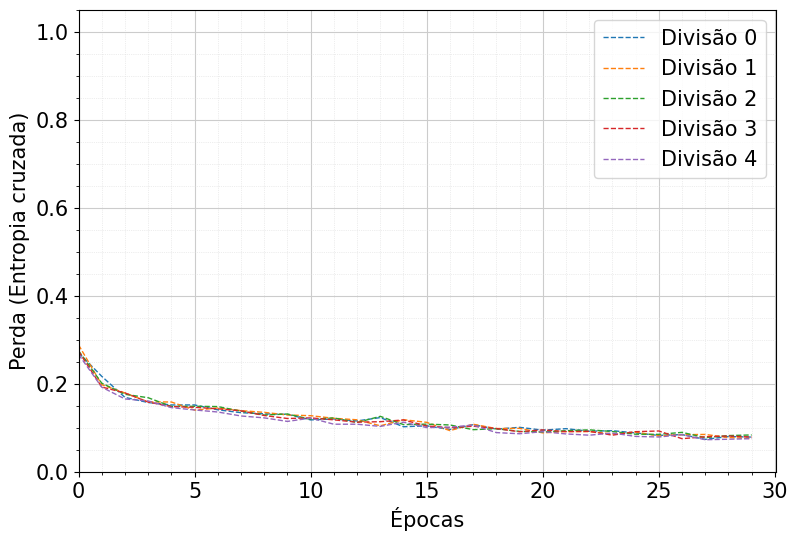

In [58]:
vgg19_train_folds = [pd.read_csv(f"../data/vgg19_fold_{i}/train_metrics.csv") for i in range(5)]
vgg19_train_folds[1].head()

plot_train_curve(
    losses_train=[i["losses_train"] for i in vgg19_train_folds],
    acc_train=[i["acc_train"] for i in vgg19_train_folds],
    name="../results/vgg19_folds_train_curve.png"
)

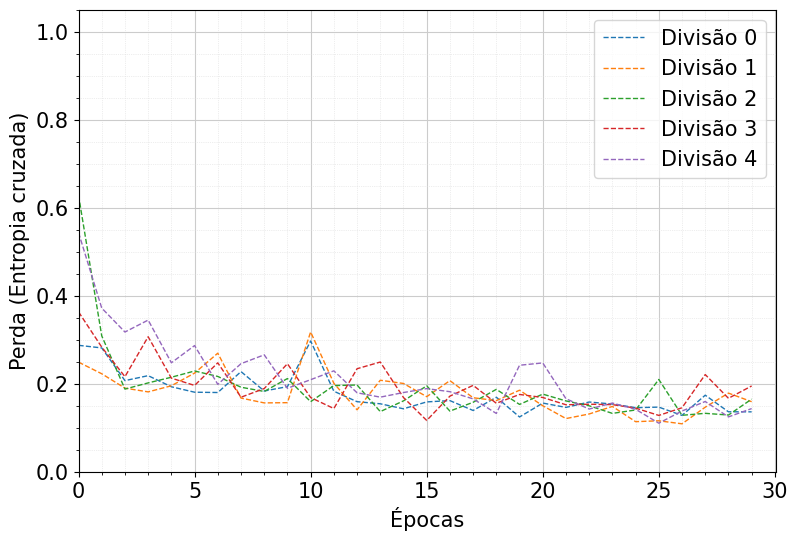

In [60]:
plot_train_curve(
    losses_train=[i["losses_val"] for i in vgg19_train_folds],
    acc_train=[i["acc_val"] for i in vgg19_train_folds],
    name="../results/vgg19_folds_val_curve.png"
)